<a href="https://colab.research.google.com/github/hackerarul/DeepLearning/blob/master/GAN_digit_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN  Demo

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

Using TensorFlow backend.


### Loading Dataset

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)


Example:
 
class label:  5


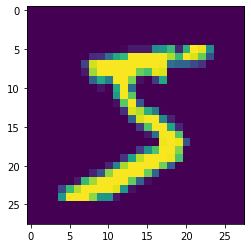

In [ ]:
# Example
idx = 0
print("Example:\n","")
print("class label: ",y_train[idx])
plt.imshow(X_train[idx].reshape(28,28))
plt.show()

### Creating Generator network

In [ ]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)
    
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

### Creating Discriminator network

In [ ]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

### Creating Creating GAN connection

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


### Utility function to visualise generated images

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

### * Training GAN 

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  7%|▋         | 9/128 [00:00<00:01, 85.49it/s]

Epoch 2


  8%|▊         | 10/128 [00:00<00:01, 94.28it/s]

Epoch 3


  8%|▊         | 10/128 [00:00<00:01, 90.39it/s]

Epoch 4


  7%|▋         | 9/128 [00:00<00:01, 89.59it/s]

Epoch 5


  7%|▋         | 9/128 [00:00<00:01, 86.57it/s]

Epoch 6


  8%|▊         | 10/128 [00:00<00:01, 93.51it/s]

Epoch 7


  8%|▊         | 10/128 [00:00<00:01, 91.73it/s]

Epoch 8


  8%|▊         | 10/128 [00:00<00:01, 90.65it/s]

Epoch 9


  7%|▋         | 9/128 [00:00<00:01, 83.25it/s]

Epoch 10


  7%|▋         | 9/128 [00:00<00:01, 87.03it/s]

Epoch 11


  8%|▊         | 10/128 [00:00<00:01, 94.77it/s]

Epoch 12


  8%|▊         | 10/128 [00:00<00:01, 93.01it/s]

Epoch 13


  8%|▊         | 10/128 [00:00<00:01, 91.50it/s]

Epoch 14


  7%|▋         | 9/128 [00:00<00:01, 87.38it/s]

Epoch 15


  8%|▊         | 10/128 [00:00<00:01, 91.44it/s]

Epoch 16


  7%|▋         | 9/128 [00:00<00:01, 82.89it/s]

Epoch 17


  7%|▋         | 9/128 [00:00<00:01, 85.00it/s]

Epoch 18


  7%|▋         | 9/128 [00:00<00:01, 89.88it/s]

Epoch 19


  8%|▊         | 10/128 [00:00<00:01, 91.08it/s]

Epoch 20


  7%|▋         | 9/128 [00:00<00:01, 89.19it/s]

Epoch 21


  8%|▊         | 10/128 [00:00<00:01, 92.79it/s]

Epoch 22


  8%|▊         | 10/128 [00:00<00:01, 94.46it/s]

Epoch 23


  6%|▋         | 8/128 [00:00<00:01, 76.05it/s]

Epoch 24


  7%|▋         | 9/128 [00:00<00:01, 85.46it/s]

Epoch 25


  8%|▊         | 10/128 [00:00<00:01, 90.70it/s]

Epoch 26


  8%|▊         | 10/128 [00:00<00:01, 93.21it/s]

Epoch 27


  8%|▊         | 10/128 [00:00<00:01, 90.93it/s]

Epoch 28


  8%|▊         | 10/128 [00:00<00:01, 92.53it/s]

Epoch 29


  7%|▋         | 9/128 [00:00<00:01, 88.55it/s]

Epoch 30


  8%|▊         | 10/128 [00:00<00:01, 88.80it/s]

Epoch 31


  8%|▊         | 10/128 [00:00<00:01, 92.07it/s]

Epoch 32


  8%|▊         | 10/128 [00:00<00:01, 90.70it/s]

Epoch 33


  7%|▋         | 9/128 [00:00<00:01, 83.51it/s]

Epoch 34


  7%|▋         | 9/128 [00:00<00:01, 88.33it/s]

Epoch 35


  8%|▊         | 10/128 [00:00<00:01, 92.09it/s]

Epoch 36


  8%|▊         | 10/128 [00:00<00:01, 89.98it/s]

Epoch 37


  7%|▋         | 9/128 [00:00<00:01, 89.42it/s]

Epoch 38


  7%|▋         | 9/128 [00:00<00:01, 89.83it/s]

Epoch 39


  8%|▊         | 10/128 [00:00<00:01, 91.41it/s]

Epoch 40


  7%|▋         | 9/128 [00:00<00:01, 85.35it/s]

Epoch 41


  8%|▊         | 10/128 [00:00<00:01, 91.92it/s]

Epoch 42


  8%|▊         | 10/128 [00:00<00:01, 92.02it/s]

Epoch 43


  7%|▋         | 9/128 [00:00<00:01, 89.32it/s]

Epoch 44


  8%|▊         | 10/128 [00:00<00:01, 91.93it/s]

Epoch 45


  8%|▊         | 10/128 [00:00<00:01, 94.59it/s]

Epoch 46


  8%|▊         | 10/128 [00:00<00:01, 94.65it/s]

Epoch 47


  8%|▊         | 10/128 [00:00<00:01, 93.63it/s]

Epoch 48


  8%|▊         | 10/128 [00:00<00:01, 91.66it/s]

Epoch 49


  7%|▋         | 9/128 [00:00<00:01, 81.18it/s]

Epoch 50


  7%|▋         | 9/128 [00:00<00:01, 82.03it/s]

Epoch 51


  8%|▊         | 10/128 [00:00<00:01, 94.57it/s]

Epoch 52


  8%|▊         | 10/128 [00:00<00:01, 90.63it/s]

Epoch 53


  7%|▋         | 9/128 [00:00<00:01, 88.73it/s]

Epoch 54


  7%|▋         | 9/128 [00:00<00:01, 86.21it/s]

Epoch 55


  7%|▋         | 9/128 [00:00<00:01, 87.13it/s]

Epoch 56


  8%|▊         | 10/128 [00:00<00:01, 95.17it/s]

Epoch 57


  7%|▋         | 9/128 [00:00<00:01, 80.03it/s]

Epoch 58


  8%|▊         | 10/128 [00:00<00:01, 94.42it/s]

Epoch 59


  8%|▊         | 10/128 [00:00<00:01, 90.42it/s]

Epoch 60


  7%|▋         | 9/128 [00:00<00:01, 87.45it/s]

Epoch 61


  8%|▊         | 10/128 [00:00<00:01, 94.05it/s]

Epoch 62


  7%|▋         | 9/128 [00:00<00:01, 88.96it/s]

Epoch 63


  8%|▊         | 10/128 [00:00<00:01, 91.30it/s]

Epoch 64


  8%|▊         | 10/128 [00:00<00:01, 93.81it/s]

Epoch 65


  8%|▊         | 10/128 [00:00<00:01, 93.78it/s]

Epoch 66


  7%|▋         | 9/128 [00:00<00:01, 86.64it/s]

Epoch 67


  8%|▊         | 10/128 [00:00<00:01, 91.63it/s]

Epoch 68


  8%|▊         | 10/128 [00:00<00:01, 91.73it/s]

Epoch 69


  8%|▊         | 10/128 [00:00<00:01, 95.39it/s]

Epoch 70


  7%|▋         | 9/128 [00:00<00:01, 83.83it/s]

Epoch 71


  8%|▊         | 10/128 [00:00<00:01, 91.43it/s]

Epoch 72


  8%|▊         | 10/128 [00:00<00:01, 92.68it/s]

Epoch 73


  8%|▊         | 10/128 [00:00<00:01, 92.01it/s]

Epoch 74


  8%|▊         | 10/128 [00:00<00:01, 94.41it/s]

Epoch 75


  8%|▊         | 10/128 [00:00<00:01, 92.47it/s]

Epoch 76


  8%|▊         | 10/128 [00:00<00:01, 92.24it/s]

Epoch 77


  8%|▊         | 10/128 [00:00<00:01, 93.18it/s]

Epoch 78


  7%|▋         | 9/128 [00:00<00:01, 88.86it/s]

Epoch 79


  7%|▋         | 9/128 [00:00<00:01, 84.60it/s]

Epoch 80


  7%|▋         | 9/128 [00:00<00:01, 85.95it/s]

Epoch 81


  8%|▊         | 10/128 [00:00<00:01, 93.45it/s]

Epoch 82


  8%|▊         | 10/128 [00:00<00:01, 92.18it/s]

Epoch 83


  7%|▋         | 9/128 [00:00<00:01, 84.95it/s]

Epoch 84


  7%|▋         | 9/128 [00:00<00:01, 88.93it/s]

Epoch 85


  8%|▊         | 10/128 [00:00<00:01, 91.49it/s]

Epoch 86


  8%|▊         | 10/128 [00:00<00:01, 91.26it/s]

Epoch 87


  7%|▋         | 9/128 [00:00<00:01, 78.54it/s]

Epoch 88


  8%|▊         | 10/128 [00:00<00:01, 92.09it/s]

Epoch 89


  7%|▋         | 9/128 [00:00<00:01, 86.20it/s]

Epoch 90


  6%|▋         | 8/128 [00:00<00:01, 78.87it/s]

Epoch 91


  8%|▊         | 10/128 [00:00<00:01, 94.55it/s]

Epoch 92


  7%|▋         | 9/128 [00:00<00:01, 84.03it/s]

Epoch 93


  8%|▊         | 10/128 [00:00<00:01, 94.73it/s]

Epoch 94


  8%|▊         | 10/128 [00:00<00:01, 91.79it/s]

Epoch 95


  7%|▋         | 9/128 [00:00<00:01, 86.31it/s]

Epoch 96


  7%|▋         | 9/128 [00:00<00:01, 89.58it/s]

Epoch 97


  8%|▊         | 10/128 [00:00<00:01, 91.29it/s]

Epoch 98


  8%|▊         | 10/128 [00:00<00:01, 93.39it/s]

Epoch 99


  8%|▊         | 10/128 [00:00<00:01, 94.28it/s]

Epoch 100


  7%|▋         | 9/128 [00:00<00:01, 87.87it/s]

Epoch 101


  8%|▊         | 10/128 [00:00<00:01, 93.83it/s]

Epoch 102


  8%|▊         | 10/128 [00:00<00:01, 92.09it/s]

Epoch 103


  7%|▋         | 9/128 [00:00<00:01, 87.67it/s]

Epoch 104


  8%|▊         | 10/128 [00:00<00:01, 95.16it/s]

Epoch 105


  8%|▊         | 10/128 [00:00<00:01, 94.92it/s]

Epoch 106


  8%|▊         | 10/128 [00:00<00:01, 92.44it/s]

Epoch 107


  8%|▊         | 10/128 [00:00<00:01, 94.79it/s]

Epoch 108


  7%|▋         | 9/128 [00:00<00:01, 88.37it/s]

Epoch 109


  7%|▋         | 9/128 [00:00<00:01, 89.89it/s]

Epoch 110


  8%|▊         | 10/128 [00:00<00:01, 92.07it/s]

Epoch 111


  8%|▊         | 10/128 [00:00<00:01, 94.79it/s]

Epoch 112


  7%|▋         | 9/128 [00:00<00:01, 88.55it/s]

Epoch 113


  8%|▊         | 10/128 [00:00<00:01, 93.86it/s]

Epoch 114


  8%|▊         | 10/128 [00:00<00:01, 92.73it/s]

Epoch 115


  8%|▊         | 10/128 [00:00<00:01, 94.19it/s]

Epoch 116


  7%|▋         | 9/128 [00:00<00:01, 87.29it/s]

Epoch 117


  8%|▊         | 10/128 [00:00<00:01, 95.56it/s]

Epoch 118


  8%|▊         | 10/128 [00:00<00:01, 95.13it/s]

Epoch 119


  8%|▊         | 10/128 [00:00<00:01, 92.66it/s]

Epoch 120


  7%|▋         | 9/128 [00:00<00:01, 84.01it/s]

Epoch 121


  8%|▊         | 10/128 [00:00<00:01, 92.10it/s]

Epoch 122


  8%|▊         | 10/128 [00:00<00:01, 96.82it/s]

Epoch 123


  7%|▋         | 9/128 [00:00<00:01, 85.76it/s]

Epoch 124


  8%|▊         | 10/128 [00:00<00:01, 93.72it/s]

Epoch 125


  8%|▊         | 10/128 [00:00<00:01, 92.97it/s]

Epoch 126


  7%|▋         | 9/128 [00:00<00:01, 88.42it/s]

Epoch 127


  8%|▊         | 10/128 [00:00<00:01, 94.62it/s]

Epoch 128


  7%|▋         | 9/128 [00:00<00:01, 86.56it/s]

Epoch 129


  8%|▊         | 10/128 [00:00<00:01, 95.12it/s]

Epoch 130


  8%|▊         | 10/128 [00:00<00:01, 96.82it/s]

Epoch 131


  8%|▊         | 10/128 [00:00<00:01, 93.98it/s]

Epoch 132


  8%|▊         | 10/128 [00:00<00:01, 93.96it/s]

Epoch 133


  8%|▊         | 10/128 [00:00<00:01, 92.86it/s]

Epoch 134


  7%|▋         | 9/128 [00:00<00:01, 89.84it/s]

Epoch 135


  8%|▊         | 10/128 [00:00<00:01, 96.83it/s]

Epoch 136


  7%|▋         | 9/128 [00:00<00:01, 89.51it/s]

Epoch 137


  8%|▊         | 10/128 [00:00<00:01, 94.72it/s]

Epoch 138


  8%|▊         | 10/128 [00:00<00:01, 91.30it/s]

Epoch 139


  8%|▊         | 10/128 [00:00<00:01, 91.22it/s]

Epoch 140


  7%|▋         | 9/128 [00:00<00:01, 85.43it/s]

Epoch 141


  8%|▊         | 10/128 [00:00<00:01, 91.08it/s]

Epoch 142


  8%|▊         | 10/128 [00:00<00:01, 94.32it/s]

Epoch 143


  8%|▊         | 10/128 [00:00<00:01, 93.26it/s]

Epoch 144


  8%|▊         | 10/128 [00:00<00:01, 92.09it/s]

Epoch 145


  7%|▋         | 9/128 [00:00<00:01, 88.43it/s]

Epoch 146


  6%|▋         | 8/128 [00:00<00:01, 74.70it/s]

Epoch 147


  6%|▋         | 8/128 [00:00<00:01, 79.28it/s]

Epoch 148


  7%|▋         | 9/128 [00:00<00:01, 82.49it/s]

Epoch 149


  7%|▋         | 9/128 [00:00<00:01, 89.10it/s]

Epoch 150


  6%|▋         | 8/128 [00:00<00:01, 74.62it/s]

Epoch 151


  8%|▊         | 10/128 [00:00<00:01, 91.65it/s]

Epoch 152


  7%|▋         | 9/128 [00:00<00:01, 82.88it/s]

Epoch 153


  6%|▋         | 8/128 [00:00<00:01, 73.63it/s]

Epoch 154


  6%|▋         | 8/128 [00:00<00:01, 75.26it/s]

Epoch 155


  7%|▋         | 9/128 [00:00<00:01, 89.14it/s]

Epoch 156


  6%|▋         | 8/128 [00:00<00:01, 79.00it/s]

Epoch 157


  7%|▋         | 9/128 [00:00<00:01, 83.10it/s]

Epoch 158


  6%|▋         | 8/128 [00:00<00:01, 79.67it/s]

Epoch 159


  7%|▋         | 9/128 [00:00<00:01, 87.67it/s]

Epoch 160


  6%|▋         | 8/128 [00:00<00:01, 77.93it/s]

Epoch 161


  8%|▊         | 10/128 [00:00<00:01, 92.23it/s]

Epoch 162


  8%|▊         | 10/128 [00:00<00:01, 95.49it/s]

Epoch 163


  8%|▊         | 10/128 [00:00<00:01, 95.06it/s]

Epoch 164


  7%|▋         | 9/128 [00:00<00:01, 89.82it/s]

Epoch 165


  7%|▋         | 9/128 [00:00<00:01, 84.34it/s]

Epoch 166


  8%|▊         | 10/128 [00:00<00:01, 92.03it/s]

Epoch 167


  8%|▊         | 10/128 [00:00<00:01, 91.38it/s]

Epoch 168


  8%|▊         | 10/128 [00:00<00:01, 95.87it/s]

Epoch 169


  8%|▊         | 10/128 [00:00<00:01, 96.49it/s]

Epoch 170


  8%|▊         | 10/128 [00:00<00:01, 94.92it/s]

Epoch 171


  8%|▊         | 10/128 [00:00<00:01, 91.37it/s]

Epoch 172


  8%|▊         | 10/128 [00:00<00:01, 94.17it/s]

Epoch 173


  7%|▋         | 9/128 [00:00<00:01, 89.49it/s]

Epoch 174


  8%|▊         | 10/128 [00:00<00:01, 95.60it/s]

Epoch 175


  7%|▋         | 9/128 [00:00<00:01, 89.64it/s]

Epoch 176


  8%|▊         | 10/128 [00:00<00:01, 96.35it/s]

Epoch 177


  8%|▊         | 10/128 [00:00<00:01, 93.69it/s]

Epoch 178


  8%|▊         | 10/128 [00:00<00:01, 90.62it/s]

Epoch 179


  8%|▊         | 10/128 [00:00<00:01, 94.27it/s]

Epoch 180


  8%|▊         | 10/128 [00:00<00:01, 91.36it/s]

Epoch 181


  8%|▊         | 10/128 [00:00<00:01, 96.78it/s]

Epoch 182


  7%|▋         | 9/128 [00:00<00:01, 87.46it/s]

Epoch 183


  8%|▊         | 10/128 [00:00<00:01, 96.91it/s]

Epoch 184


  8%|▊         | 10/128 [00:00<00:01, 93.09it/s]

Epoch 185


  8%|▊         | 10/128 [00:00<00:01, 93.45it/s]

Epoch 186


  8%|▊         | 10/128 [00:00<00:01, 93.03it/s]

Epoch 187


  8%|▊         | 10/128 [00:00<00:01, 89.29it/s]

Epoch 188


  8%|▊         | 10/128 [00:00<00:01, 89.65it/s]

Epoch 189


  8%|▊         | 10/128 [00:00<00:01, 93.90it/s]

Epoch 190


  7%|▋         | 9/128 [00:00<00:01, 83.07it/s]

Epoch 191


  8%|▊         | 10/128 [00:00<00:01, 93.08it/s]

Epoch 192


  8%|▊         | 10/128 [00:00<00:01, 94.00it/s]

Epoch 193


  8%|▊         | 10/128 [00:00<00:01, 94.31it/s]

Epoch 194


  8%|▊         | 10/128 [00:00<00:01, 93.04it/s]

Epoch 195


  8%|▊         | 10/128 [00:00<00:01, 92.89it/s]

Epoch 196


  8%|▊         | 10/128 [00:00<00:01, 91.79it/s]

Epoch 197


  7%|▋         | 9/128 [00:00<00:01, 89.84it/s]

Epoch 198


  7%|▋         | 9/128 [00:00<00:01, 89.05it/s]

Epoch 199


  8%|▊         | 10/128 [00:00<00:01, 95.65it/s]

Epoch 200


  8%|▊         | 10/128 [00:00<00:01, 95.14it/s]

Epoch 201


  8%|▊         | 10/128 [00:00<00:01, 96.63it/s]

Epoch 202


  8%|▊         | 10/128 [00:00<00:01, 91.23it/s]

Epoch 203


  8%|▊         | 10/128 [00:00<00:01, 95.69it/s]

Epoch 204


  8%|▊         | 10/128 [00:00<00:01, 93.60it/s]

Epoch 205


  8%|▊         | 10/128 [00:00<00:01, 93.29it/s]

Epoch 206


  8%|▊         | 10/128 [00:00<00:01, 96.73it/s]

Epoch 207


  8%|▊         | 10/128 [00:00<00:01, 89.42it/s]

Epoch 208


  8%|▊         | 10/128 [00:00<00:01, 93.53it/s]

Epoch 209


  7%|▋         | 9/128 [00:00<00:01, 86.41it/s]

Epoch 210


  8%|▊         | 10/128 [00:00<00:01, 97.08it/s]

Epoch 211


  8%|▊         | 10/128 [00:00<00:01, 96.25it/s]

Epoch 212


  8%|▊         | 10/128 [00:00<00:01, 95.28it/s]

Epoch 213


  8%|▊         | 10/128 [00:00<00:01, 97.06it/s]

Epoch 214


  8%|▊         | 10/128 [00:00<00:01, 97.00it/s]

Epoch 215


  8%|▊         | 10/128 [00:00<00:01, 95.41it/s]

Epoch 216


  8%|▊         | 10/128 [00:00<00:01, 91.10it/s]

Epoch 217


  8%|▊         | 10/128 [00:00<00:01, 97.10it/s]

Epoch 218


  7%|▋         | 9/128 [00:00<00:01, 89.72it/s]

Epoch 219


  8%|▊         | 10/128 [00:00<00:01, 94.47it/s]

Epoch 220


  8%|▊         | 10/128 [00:00<00:01, 93.55it/s]

Epoch 221


  8%|▊         | 10/128 [00:00<00:01, 95.38it/s]

Epoch 222


  8%|▊         | 10/128 [00:00<00:01, 97.21it/s]

Epoch 223


  8%|▊         | 10/128 [00:00<00:01, 97.03it/s]

Epoch 224


  8%|▊         | 10/128 [00:00<00:01, 96.58it/s]

Epoch 225


  7%|▋         | 9/128 [00:00<00:01, 85.94it/s]

Epoch 226


  7%|▋         | 9/128 [00:00<00:01, 87.21it/s]

Epoch 227


  8%|▊         | 10/128 [00:00<00:01, 96.39it/s]

Epoch 228


  8%|▊         | 10/128 [00:00<00:01, 98.28it/s]

Epoch 229


  7%|▋         | 9/128 [00:00<00:01, 88.04it/s]

Epoch 230


  8%|▊         | 10/128 [00:00<00:01, 94.51it/s]

Epoch 231


  8%|▊         | 10/128 [00:00<00:01, 98.76it/s]

Epoch 232


  8%|▊         | 10/128 [00:00<00:01, 93.86it/s]

Epoch 233


  8%|▊         | 10/128 [00:00<00:01, 92.56it/s]

Epoch 234


  8%|▊         | 10/128 [00:00<00:01, 98.96it/s]

Epoch 235


  8%|▊         | 10/128 [00:00<00:01, 95.16it/s]

Epoch 236


  8%|▊         | 10/128 [00:00<00:01, 92.74it/s]

Epoch 237


  8%|▊         | 10/128 [00:00<00:01, 95.76it/s]

Epoch 238


  8%|▊         | 10/128 [00:00<00:01, 92.78it/s]

Epoch 239


  8%|▊         | 10/128 [00:00<00:01, 90.57it/s]

Epoch 240


  7%|▋         | 9/128 [00:00<00:01, 89.41it/s]

Epoch 241


  8%|▊         | 10/128 [00:00<00:01, 97.88it/s]

Epoch 242


  8%|▊         | 10/128 [00:00<00:01, 98.19it/s]

Epoch 243


  8%|▊         | 10/128 [00:00<00:01, 97.16it/s]

Epoch 244


  8%|▊         | 10/128 [00:00<00:01, 97.13it/s]

Epoch 245


  8%|▊         | 10/128 [00:00<00:01, 97.39it/s]

Epoch 246


  8%|▊         | 10/128 [00:00<00:01, 92.02it/s]

Epoch 247


  8%|▊         | 10/128 [00:00<00:01, 91.11it/s]

Epoch 248


  8%|▊         | 10/128 [00:00<00:01, 93.71it/s]

Epoch 249


  8%|▊         | 10/128 [00:00<00:01, 93.81it/s]

Epoch 250


  7%|▋         | 9/128 [00:00<00:01, 88.69it/s]

Epoch 251


  8%|▊         | 10/128 [00:00<00:01, 93.26it/s]

Epoch 252


  8%|▊         | 10/128 [00:00<00:01, 94.99it/s]

Epoch 253


  8%|▊         | 10/128 [00:00<00:01, 94.27it/s]

Epoch 254


  8%|▊         | 10/128 [00:00<00:01, 95.57it/s]

Epoch 255


  8%|▊         | 10/128 [00:00<00:01, 93.05it/s]

Epoch 256


  7%|▋         | 9/128 [00:00<00:01, 85.39it/s]

Epoch 257


  8%|▊         | 10/128 [00:00<00:01, 91.88it/s]

Epoch 258


  8%|▊         | 10/128 [00:00<00:01, 92.54it/s]

Epoch 259


  8%|▊         | 10/128 [00:00<00:01, 97.07it/s]

Epoch 260


  8%|▊         | 10/128 [00:00<00:01, 91.09it/s]

Epoch 261


  8%|▊         | 10/128 [00:00<00:01, 93.31it/s]

Epoch 262


  8%|▊         | 10/128 [00:00<00:01, 94.26it/s]

Epoch 263


  8%|▊         | 10/128 [00:00<00:01, 96.11it/s]

Epoch 264


  8%|▊         | 10/128 [00:00<00:01, 97.95it/s]

Epoch 265


  8%|▊         | 10/128 [00:00<00:01, 93.33it/s]

Epoch 266


  8%|▊         | 10/128 [00:00<00:01, 93.71it/s]

Epoch 267


  8%|▊         | 10/128 [00:00<00:01, 95.64it/s]

Epoch 268


  8%|▊         | 10/128 [00:00<00:01, 94.04it/s]

Epoch 269


  8%|▊         | 10/128 [00:00<00:01, 98.66it/s]

Epoch 270


  8%|▊         | 10/128 [00:00<00:01, 95.20it/s]

Epoch 271


  8%|▊         | 10/128 [00:00<00:01, 97.46it/s]

Epoch 272


  8%|▊         | 10/128 [00:00<00:01, 96.91it/s]

Epoch 273


  8%|▊         | 10/128 [00:00<00:01, 95.61it/s]

Epoch 274


  8%|▊         | 10/128 [00:00<00:01, 92.87it/s]

Epoch 275


  8%|▊         | 10/128 [00:00<00:01, 96.00it/s]

Epoch 276


  8%|▊         | 10/128 [00:00<00:01, 95.97it/s]

Epoch 277


  8%|▊         | 10/128 [00:00<00:01, 99.25it/s]

Epoch 278


  8%|▊         | 10/128 [00:00<00:01, 92.75it/s]

Epoch 279


  7%|▋         | 9/128 [00:00<00:01, 85.78it/s]

Epoch 280


  6%|▋         | 8/128 [00:00<00:01, 79.09it/s]

Epoch 281


  8%|▊         | 10/128 [00:00<00:01, 96.30it/s]

Epoch 282


  8%|▊         | 10/128 [00:00<00:01, 97.59it/s]

Epoch 283


  7%|▋         | 9/128 [00:00<00:01, 88.54it/s]

Epoch 284


  8%|▊         | 10/128 [00:00<00:01, 96.94it/s]

Epoch 285


  8%|▊         | 10/128 [00:00<00:01, 96.06it/s]

Epoch 286


  7%|▋         | 9/128 [00:00<00:01, 86.72it/s]

Epoch 287


  8%|▊         | 10/128 [00:00<00:01, 92.91it/s]

Epoch 288


  8%|▊         | 10/128 [00:00<00:01, 94.99it/s]

Epoch 289


  8%|▊         | 10/128 [00:00<00:01, 99.11it/s]

Epoch 290


  8%|▊         | 10/128 [00:00<00:01, 94.78it/s]

Epoch 291


  8%|▊         | 10/128 [00:00<00:01, 96.22it/s]

Epoch 292


  8%|▊         | 10/128 [00:00<00:01, 97.61it/s]

Epoch 293


  8%|▊         | 10/128 [00:00<00:01, 98.07it/s]

Epoch 294


  8%|▊         | 10/128 [00:00<00:01, 94.80it/s]

Epoch 295


  8%|▊         | 10/128 [00:00<00:01, 96.95it/s]

Epoch 296


  8%|▊         | 10/128 [00:00<00:01, 94.27it/s]

Epoch 297


  8%|▊         | 10/128 [00:00<00:01, 92.62it/s]

Epoch 298


  8%|▊         | 10/128 [00:00<00:01, 97.18it/s]

Epoch 299


  8%|▊         | 10/128 [00:00<00:01, 93.57it/s]

Epoch 300


  7%|▋         | 9/128 [00:00<00:01, 89.53it/s]

Epoch 301


  8%|▊         | 10/128 [00:00<00:01, 94.55it/s]

Epoch 302


  8%|▊         | 10/128 [00:00<00:01, 97.44it/s]

Epoch 303


  8%|▊         | 10/128 [00:00<00:01, 96.97it/s]

Epoch 304


  7%|▋         | 9/128 [00:00<00:01, 81.81it/s]

Epoch 305


  7%|▋         | 9/128 [00:00<00:01, 89.30it/s]

Epoch 306


  8%|▊         | 10/128 [00:00<00:01, 90.51it/s]

Epoch 307


  8%|▊         | 10/128 [00:00<00:01, 95.62it/s]

Epoch 308


  8%|▊         | 10/128 [00:00<00:01, 98.68it/s]

Epoch 309


  8%|▊         | 10/128 [00:00<00:01, 97.54it/s]

Epoch 310


  8%|▊         | 10/128 [00:00<00:01, 97.79it/s]

Epoch 311


  8%|▊         | 10/128 [00:00<00:01, 98.86it/s]

Epoch 312


  8%|▊         | 10/128 [00:00<00:01, 90.68it/s]

Epoch 313


  8%|▊         | 10/128 [00:00<00:01, 93.73it/s]

Epoch 314


  8%|▊         | 10/128 [00:00<00:01, 97.15it/s]

Epoch 315


  8%|▊         | 10/128 [00:00<00:01, 94.14it/s]

Epoch 316


  8%|▊         | 10/128 [00:00<00:01, 95.65it/s]

Epoch 317


  8%|▊         | 10/128 [00:00<00:01, 90.85it/s]

Epoch 318


  7%|▋         | 9/128 [00:00<00:01, 87.84it/s]

Epoch 319


  8%|▊         | 10/128 [00:00<00:01, 97.19it/s]

Epoch 320


  8%|▊         | 10/128 [00:00<00:01, 92.84it/s]

Epoch 321


  7%|▋         | 9/128 [00:00<00:01, 87.25it/s]

Epoch 322


  7%|▋         | 9/128 [00:00<00:01, 86.28it/s]

Epoch 323


  8%|▊         | 10/128 [00:00<00:01, 98.43it/s]

Epoch 324


  8%|▊         | 10/128 [00:00<00:01, 97.03it/s]

Epoch 325


  7%|▋         | 9/128 [00:00<00:01, 89.81it/s]

Epoch 326


  8%|▊         | 10/128 [00:00<00:01, 95.21it/s]

Epoch 327


  8%|▊         | 10/128 [00:00<00:01, 97.20it/s]

Epoch 328


  8%|▊         | 10/128 [00:00<00:01, 97.41it/s]

Epoch 329


  8%|▊         | 10/128 [00:00<00:01, 92.42it/s]

Epoch 330


  8%|▊         | 10/128 [00:00<00:01, 94.30it/s]

Epoch 331


  8%|▊         | 10/128 [00:00<00:01, 95.92it/s]

Epoch 332


  8%|▊         | 10/128 [00:00<00:01, 92.92it/s]

Epoch 333


  8%|▊         | 10/128 [00:00<00:01, 92.83it/s]

Epoch 334


  8%|▊         | 10/128 [00:00<00:01, 93.93it/s]

Epoch 335


  8%|▊         | 10/128 [00:00<00:01, 95.33it/s]

Epoch 336


  8%|▊         | 10/128 [00:00<00:01, 94.37it/s]

Epoch 337


  8%|▊         | 10/128 [00:00<00:01, 96.30it/s]

Epoch 338


  8%|▊         | 10/128 [00:00<00:01, 94.49it/s]

Epoch 339


  8%|▊         | 10/128 [00:00<00:01, 89.13it/s]

Epoch 340


  8%|▊         | 10/128 [00:00<00:01, 91.74it/s]

Epoch 341


  8%|▊         | 10/128 [00:00<00:01, 95.17it/s]

Epoch 342


  8%|▊         | 10/128 [00:00<00:01, 97.87it/s]

Epoch 343


  8%|▊         | 10/128 [00:00<00:01, 95.13it/s]

Epoch 344


  8%|▊         | 10/128 [00:00<00:01, 91.79it/s]

Epoch 345


  8%|▊         | 10/128 [00:00<00:01, 96.76it/s]

Epoch 346


  7%|▋         | 9/128 [00:00<00:01, 88.62it/s]

Epoch 347


  8%|▊         | 10/128 [00:00<00:01, 95.78it/s]

Epoch 348


  8%|▊         | 10/128 [00:00<00:01, 98.35it/s]

Epoch 349


  7%|▋         | 9/128 [00:00<00:01, 87.80it/s]

Epoch 350


  8%|▊         | 10/128 [00:00<00:01, 95.58it/s]

Epoch 351


  8%|▊         | 10/128 [00:00<00:01, 91.15it/s]

Epoch 352


  8%|▊         | 10/128 [00:00<00:01, 96.55it/s]

Epoch 353


  8%|▊         | 10/128 [00:00<00:01, 99.09it/s]

Epoch 354


  8%|▊         | 10/128 [00:00<00:01, 93.29it/s]

Epoch 355


  8%|▊         | 10/128 [00:00<00:01, 90.43it/s]

Epoch 356


  8%|▊         | 10/128 [00:00<00:01, 94.25it/s]

Epoch 357


  8%|▊         | 10/128 [00:00<00:01, 96.04it/s]

Epoch 358


  8%|▊         | 10/128 [00:00<00:01, 97.01it/s]

Epoch 359


  8%|▊         | 10/128 [00:00<00:01, 92.87it/s]

Epoch 360


  8%|▊         | 10/128 [00:00<00:01, 93.63it/s]

Epoch 361


  8%|▊         | 10/128 [00:00<00:01, 91.99it/s]

Epoch 362


  8%|▊         | 10/128 [00:00<00:01, 93.93it/s]

Epoch 363


  8%|▊         | 10/128 [00:00<00:01, 96.34it/s]

Epoch 364


  7%|▋         | 9/128 [00:00<00:01, 87.10it/s]

Epoch 365


  7%|▋         | 9/128 [00:00<00:01, 87.98it/s]

Epoch 366


  7%|▋         | 9/128 [00:00<00:01, 88.43it/s]

Epoch 367


  6%|▋         | 8/128 [00:00<00:01, 73.12it/s]

Epoch 368


  7%|▋         | 9/128 [00:00<00:01, 89.20it/s]

Epoch 369


  7%|▋         | 9/128 [00:00<00:01, 88.31it/s]

Epoch 370


  7%|▋         | 9/128 [00:00<00:01, 88.13it/s]

Epoch 371


  8%|▊         | 10/128 [00:00<00:01, 90.15it/s]

Epoch 372


  8%|▊         | 10/128 [00:00<00:01, 96.33it/s]

Epoch 373


  8%|▊         | 10/128 [00:00<00:01, 92.88it/s]

Epoch 374


  8%|▊         | 10/128 [00:00<00:01, 92.82it/s]

Epoch 375


  8%|▊         | 10/128 [00:00<00:01, 96.60it/s]

Epoch 376


  8%|▊         | 10/128 [00:00<00:01, 94.74it/s]

Epoch 377


  8%|▊         | 10/128 [00:00<00:01, 96.60it/s]

Epoch 378


  8%|▊         | 10/128 [00:00<00:01, 97.05it/s]

Epoch 379


  8%|▊         | 10/128 [00:00<00:01, 91.96it/s]

Epoch 380


  8%|▊         | 10/128 [00:00<00:01, 94.88it/s]

Epoch 381


  7%|▋         | 9/128 [00:00<00:01, 89.26it/s]

Epoch 382


  8%|▊         | 10/128 [00:00<00:01, 92.23it/s]

Epoch 383


  8%|▊         | 10/128 [00:00<00:01, 97.77it/s]

Epoch 384


  8%|▊         | 10/128 [00:00<00:01, 98.94it/s]

Epoch 385


  7%|▋         | 9/128 [00:00<00:01, 89.61it/s]

Epoch 386


  8%|▊         | 10/128 [00:00<00:01, 97.48it/s]

Epoch 387


  6%|▋         | 8/128 [00:00<00:01, 77.90it/s]

Epoch 388


  8%|▊         | 10/128 [00:00<00:01, 90.91it/s]

Epoch 389


  8%|▊         | 10/128 [00:00<00:01, 95.52it/s]

Epoch 390


  7%|▋         | 9/128 [00:00<00:01, 88.29it/s]

Epoch 391


  8%|▊         | 10/128 [00:00<00:01, 98.18it/s]

Epoch 392


  8%|▊         | 10/128 [00:00<00:01, 97.44it/s]

Epoch 393


  8%|▊         | 10/128 [00:00<00:01, 96.14it/s]

Epoch 394


  8%|▊         | 10/128 [00:00<00:01, 95.94it/s]

Epoch 395


  8%|▊         | 10/128 [00:00<00:01, 97.89it/s]

Epoch 396


  8%|▊         | 10/128 [00:00<00:01, 98.89it/s]

Epoch 397


  8%|▊         | 10/128 [00:00<00:01, 96.76it/s]

Epoch 398


  8%|▊         | 10/128 [00:00<00:01, 95.83it/s]

Epoch 399


  8%|▊         | 10/128 [00:00<00:01, 92.96it/s]

Epoch 400


100%|██████████| 128/128 [00:01<00:00, 93.69it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


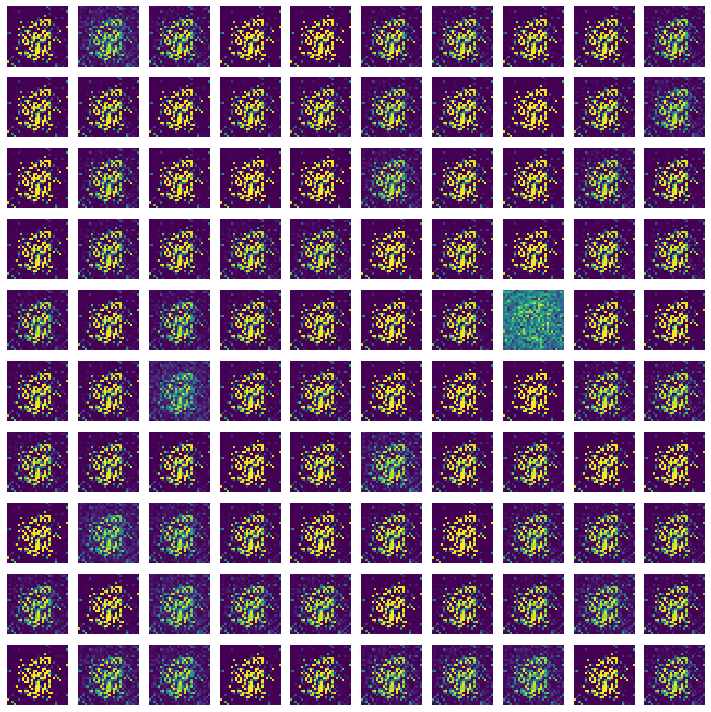

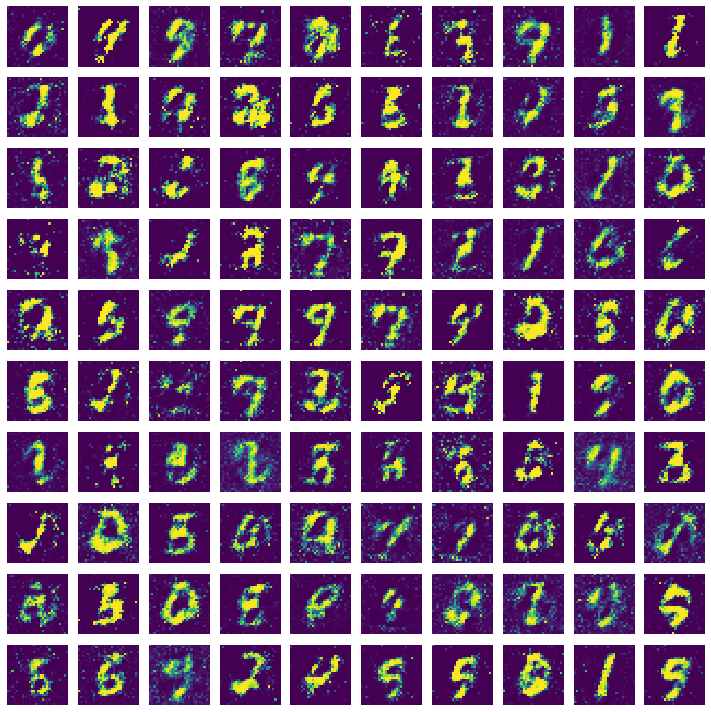

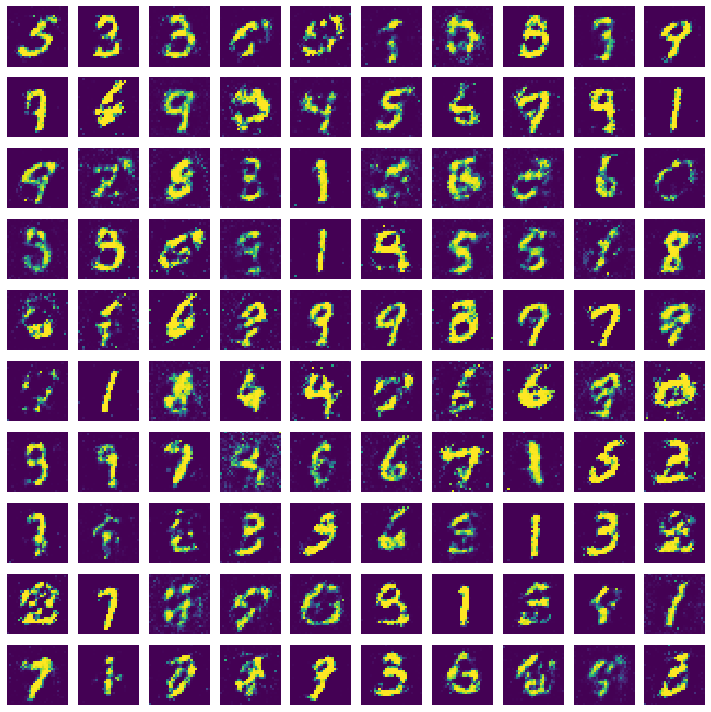

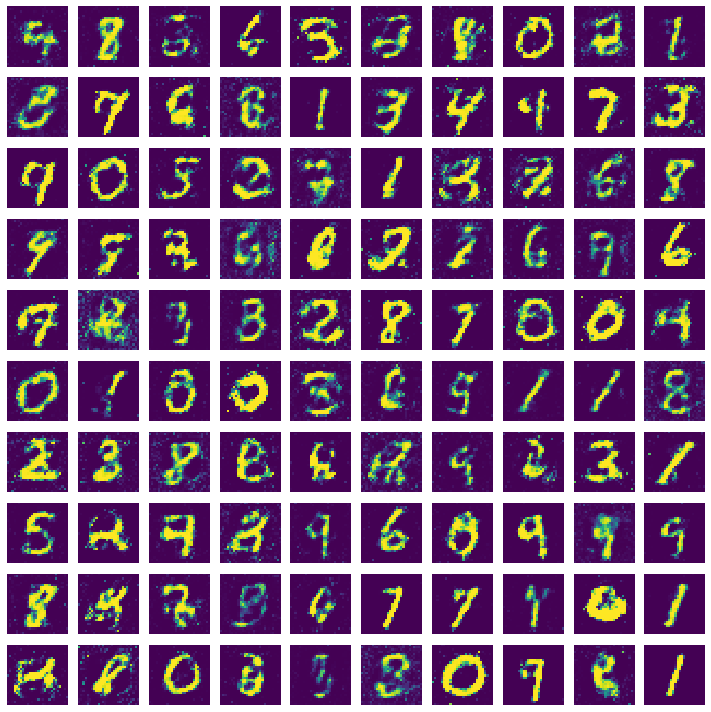

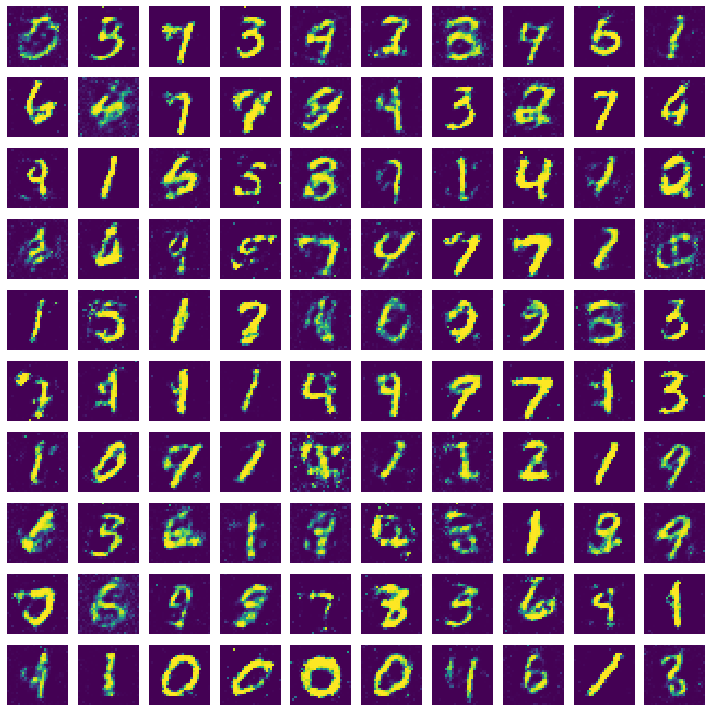

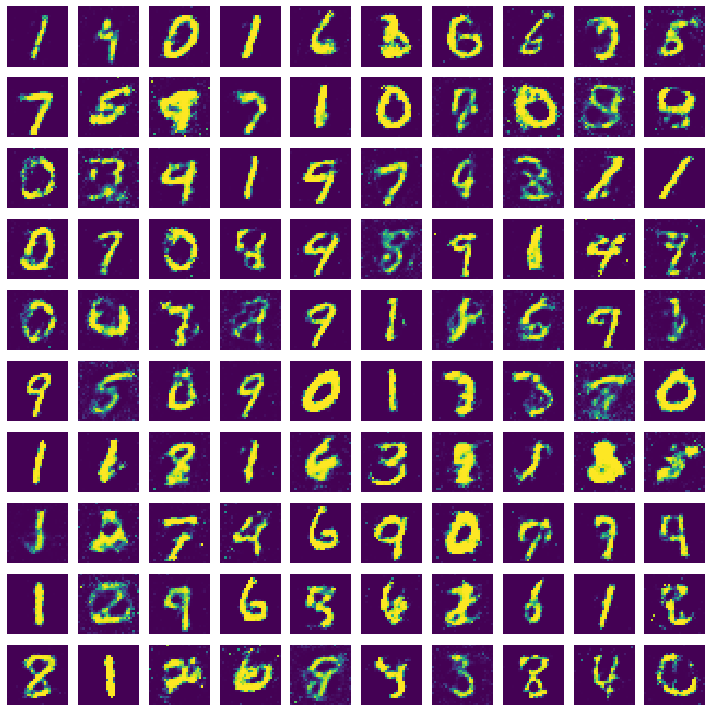

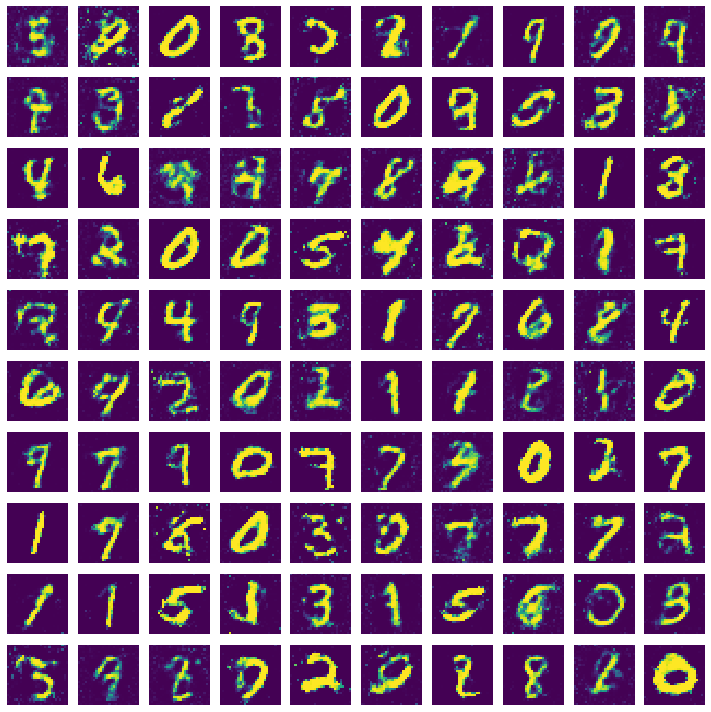

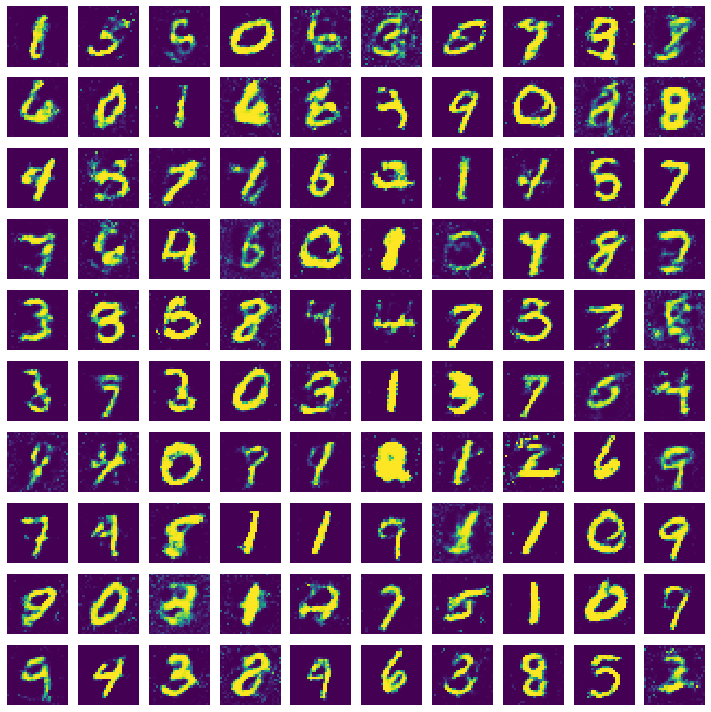

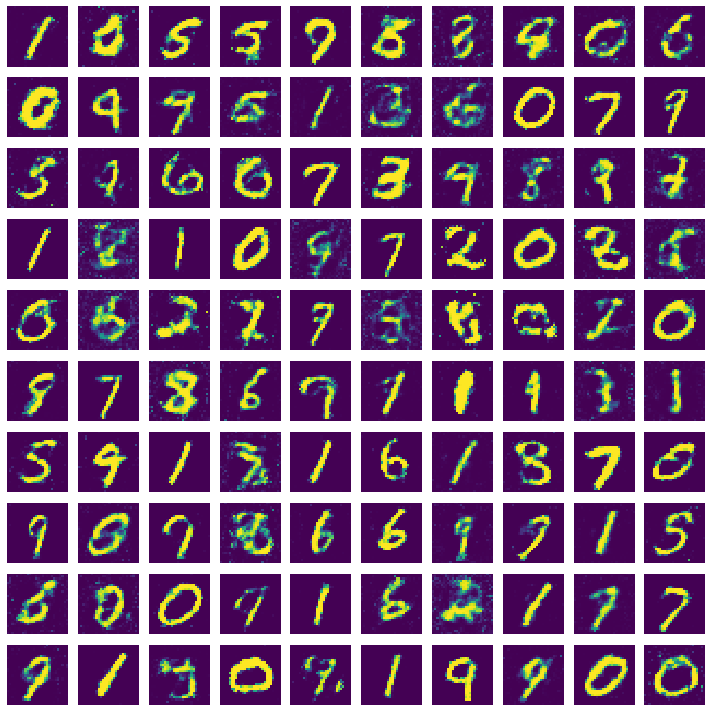

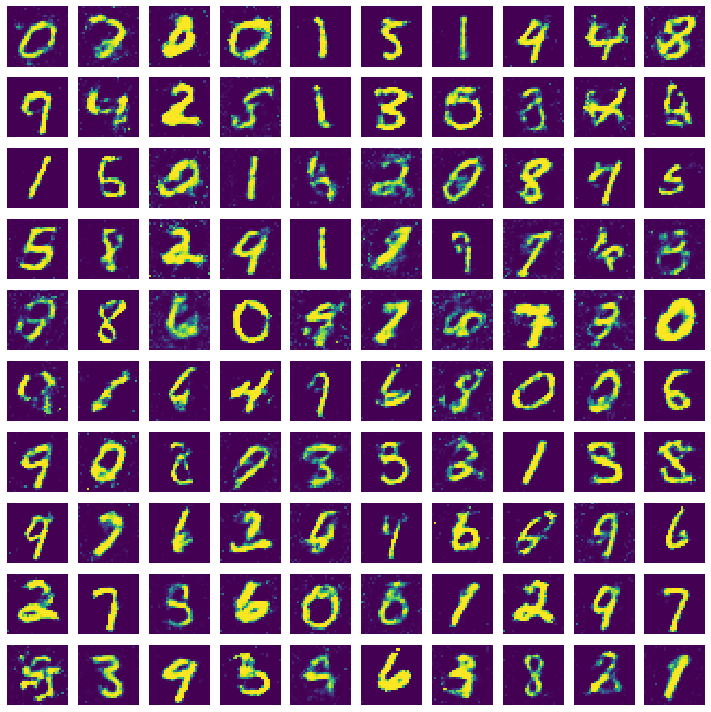

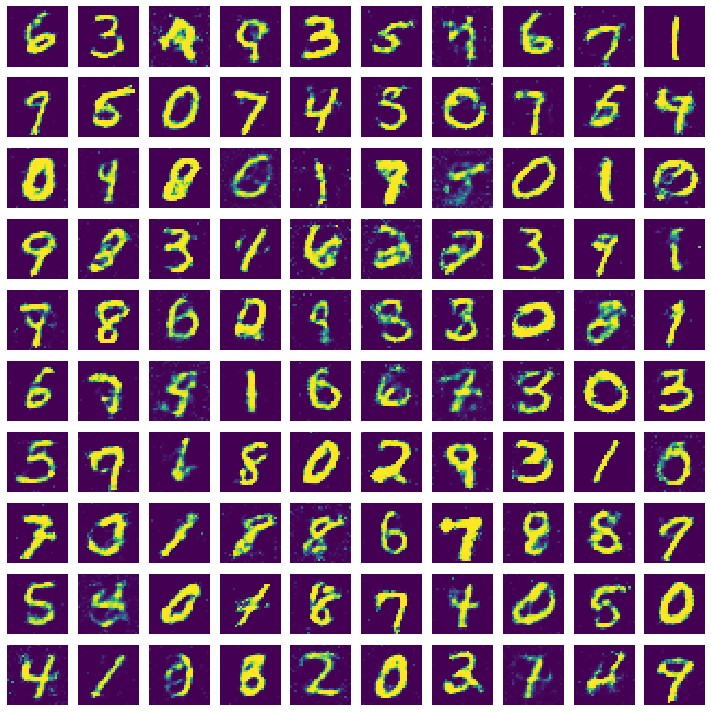

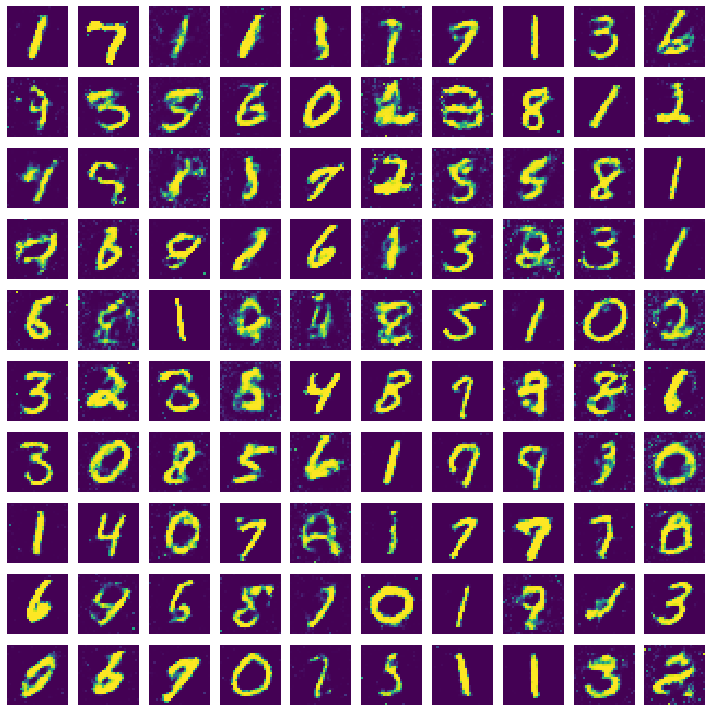

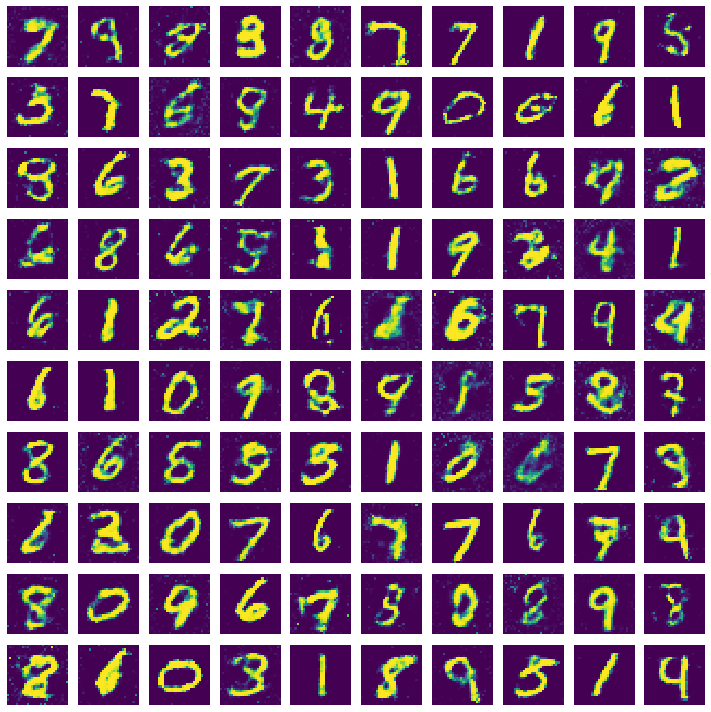

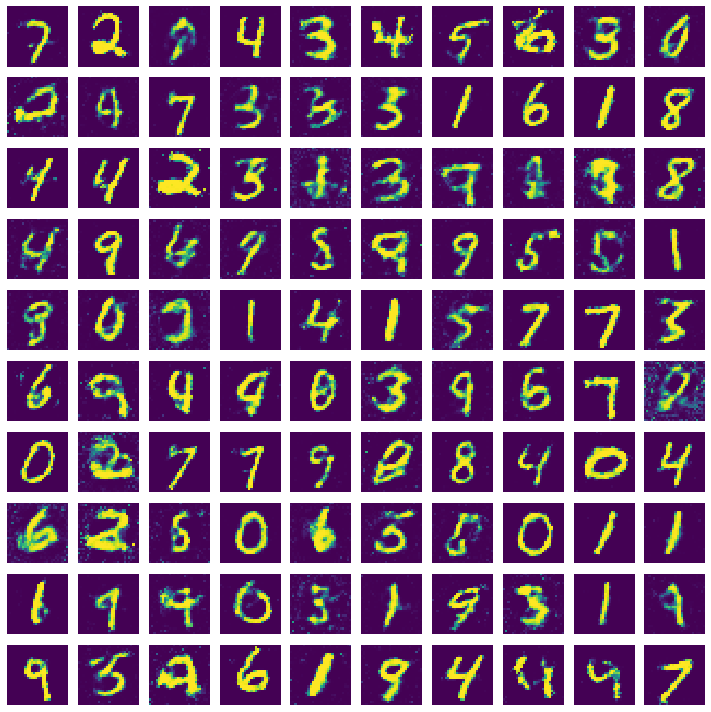

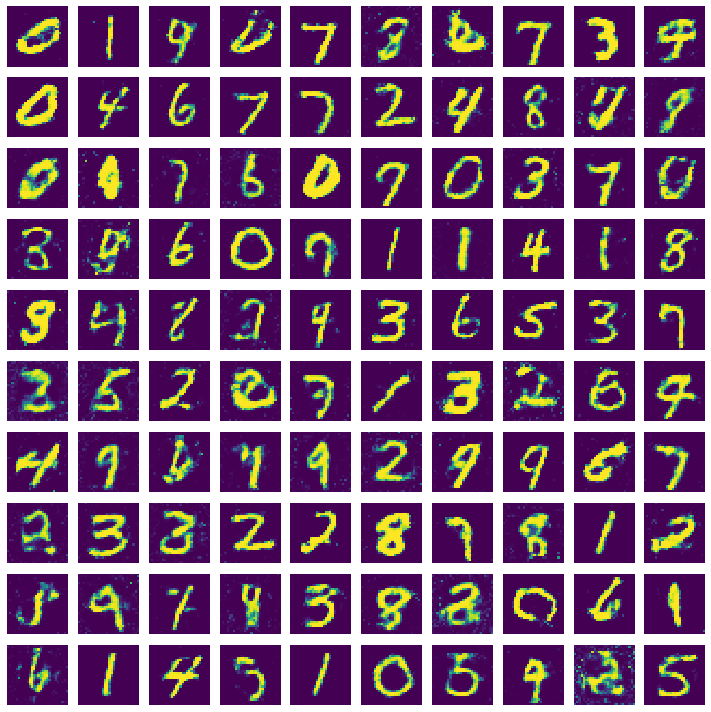

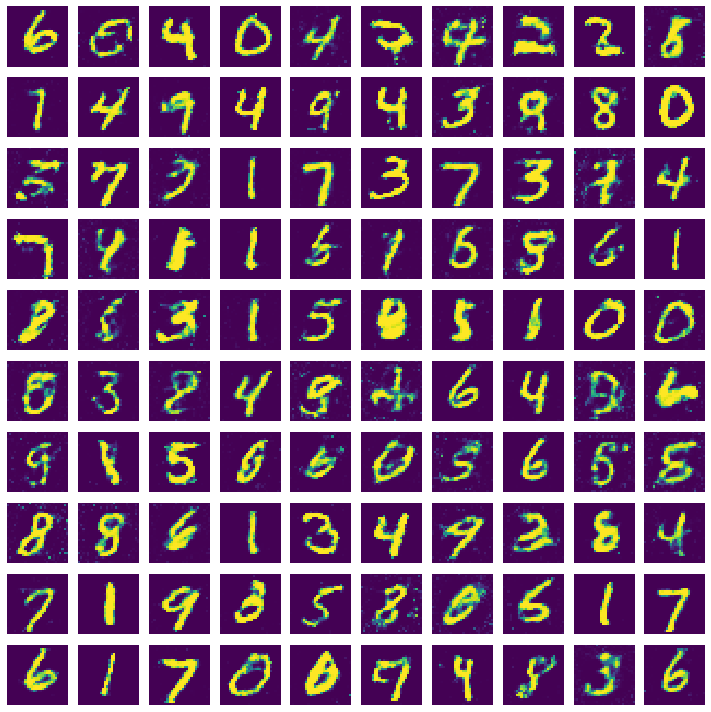

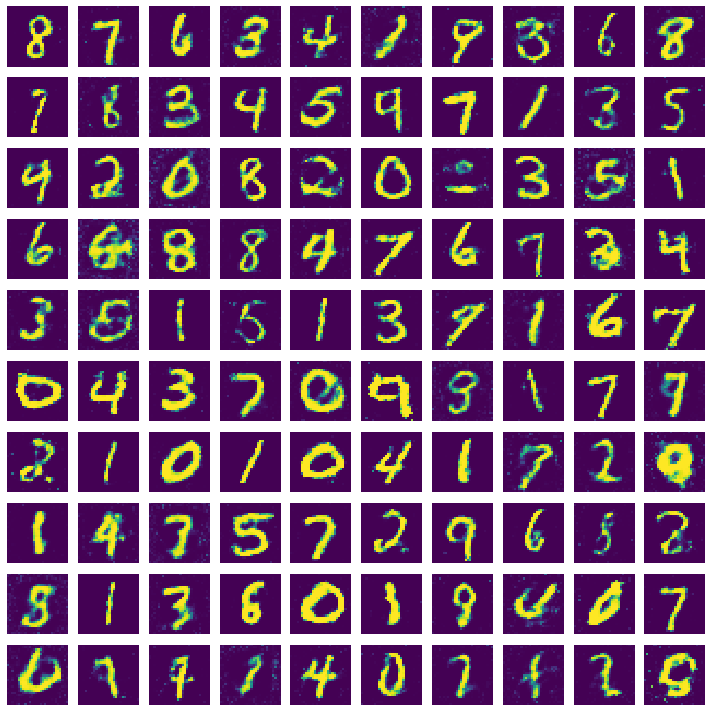

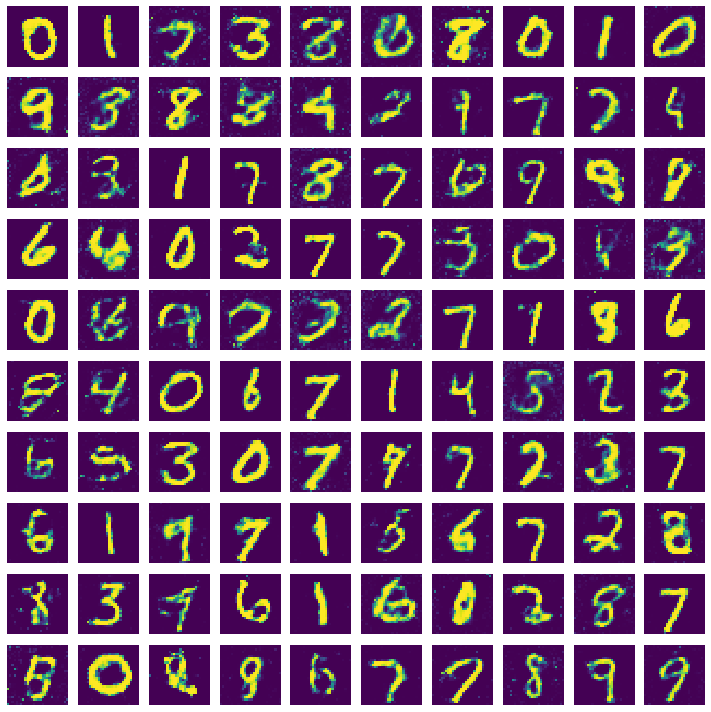

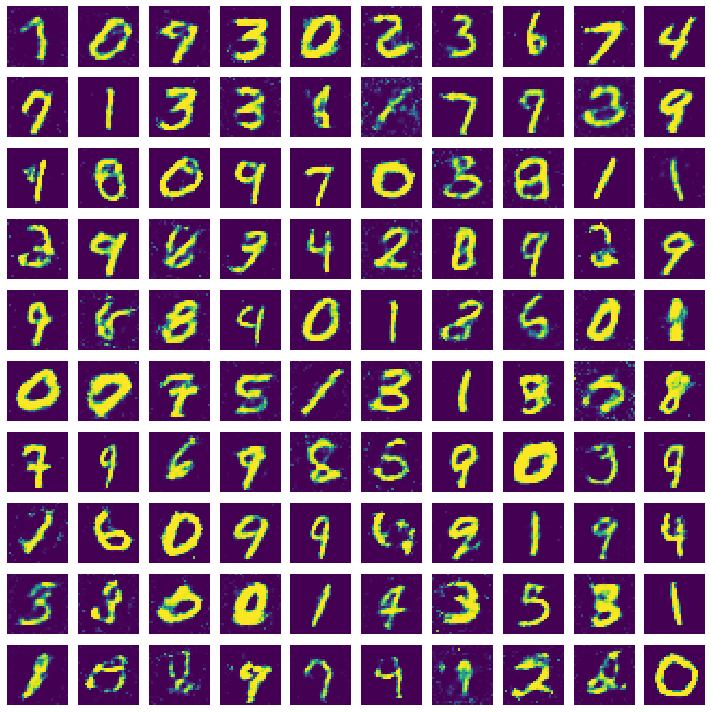

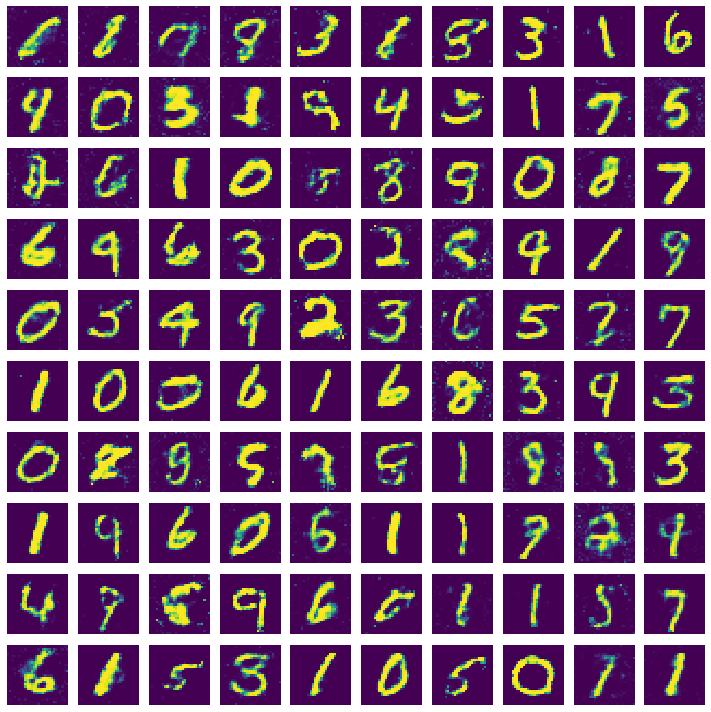

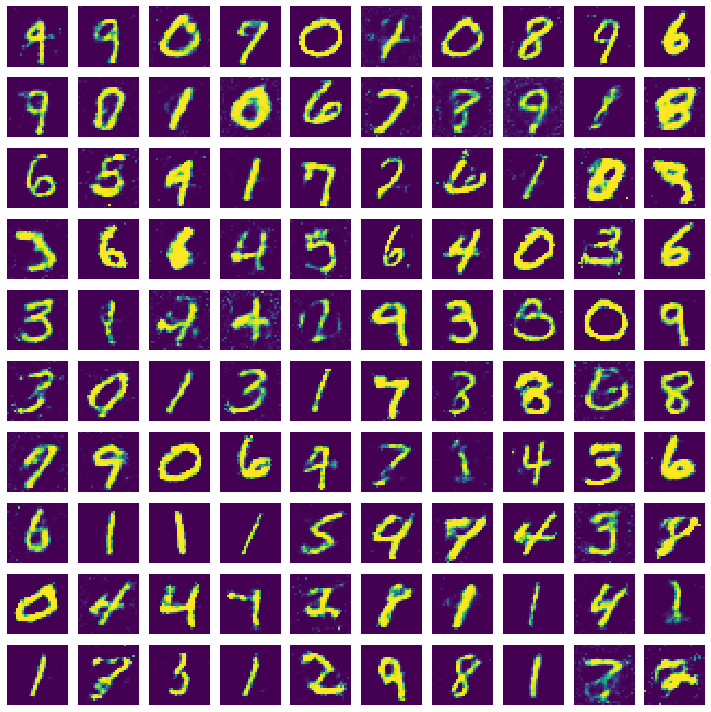

In [ ]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    #batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            # Construct different batches of real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)

    return generator
genrtr = training(400,128)

### Using generator to generate artificial samples

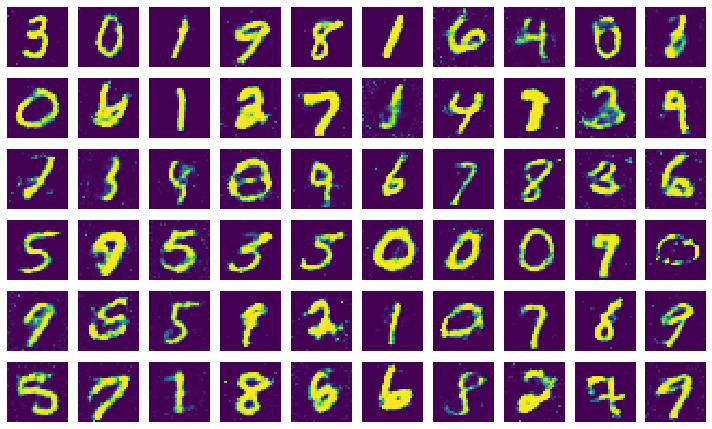

In [ ]:
def generate_example(generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    
generate_example(genrtr,60)

In [ ]:
"""Creating a GIF out of the saved images"""

import imageio
import glob

anim_file = 'gan_mnist.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('gan*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


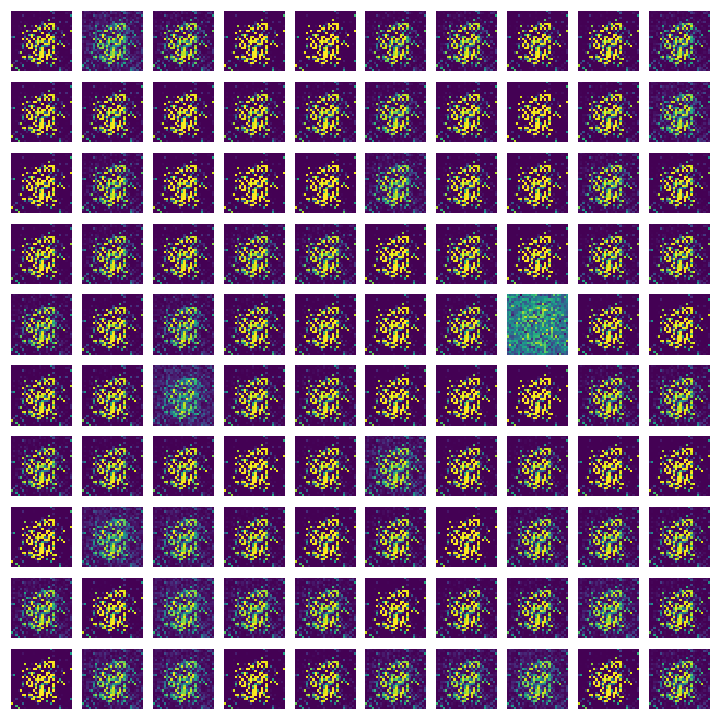

In [ ]:
import IPython
from IPython.display import Image
Image('gan_mnist.gif', format='png')
#if IPython.version_info > (6,2,0,''):
#display.Image(filename=anim_file)

In [ ]:
"""To download the gif created"""

try:
  from google.colab import files
except:
  ImportError
  pass
else:
  files.download(anim_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>